<a href="https://colab.research.google.com/github/yohanesnuwara/reportminer/blob/main/ReportMiner_for_PDF_PPT_XLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ReportMiner

Using ReportMiner on Google Colab. ReportMiner is an easy-to-use wrapper for multimodal retrieval augmented generation (RAG) tasks for technical reports. It works even for PDFs, Excel spreadsheets, and Presentations.

Here we will use ColPali-1.2 as our embedding model and SmolVLM as our visual language model to perform RAG on multiple reports, not just one report. Note you need a High-Memory RAM option on Colab Pro and GPU T4

In [1]:
# Required for PPT conversion
!sudo apt-get install -y ttf-mscorefonts-installer # Type 'yes' for it
!sudo apt-get install fonts-dejavu
!sudo apt-get install fonts-liberation

# Required for Excel conversion
!sudo apt install -y libgdiplus
!sudo ln -s /usr/lib/libgdiplus.so /usr/lib/libgdiplus

# Required for basic package
!apt-get update
!apt-get install -y poppler-utils


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cabextract distro-info libfontenc1 libmspack0 python3-chardet
  python3-debconf python3-debian python3-distro-info python3-distupgrade
  python3-update-manager python3-yaml ubuntu-advantage-tools ubuntu-pro-client
  ubuntu-pro-client-l10n ubuntu-release-upgrader-core update-manager-core
  update-notifier-common xfonts-encodings xfonts-utils zstd
Suggested packages:
  shunit2
The following NEW packages will be installed:
  cabextract distro-info libfontenc1 libmspack0 python3-chardet
  python3-debconf python3-debian python3-distro-info python3-distupgrade
  python3-update-manager python3-yaml ttf-mscorefonts-installer
  ubuntu-advantage-tools ubuntu-pro-client ubuntu-pro-client-l10n
  ubuntu-release-upgrader-core update-manager-core update-notifier-common
  xfonts-encodings xfonts-utils zstd
0 upgraded, 21 newly installed, 0 to remove an

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Clone repository
!git clone https://github.com/yohanesnuwara/reportminer

# Install full package for excel and ppt support
!pip install '/content/reportminer/.[xls,ppt]'


Cloning into 'reportminer'...
remote: Enumerating objects: 189, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 189 (delta 16), reused 3 (delta 3), pack-reused 161 (from 1)
Receiving objects: 100% (189/189), 9.77 MiB | 36.78 MiB/s, done.
Resolving deltas: 100% (104/104), done.
Processing ./reportminer
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.3/91.3 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.9/517.9 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━

In [5]:
from reportminer import rag, rag_folder

Here, we use ColPali and Smol to setup our RAG models

In [7]:
# Setup models
rag_models = rag.setup_model()

Selected embedding model: vidore/colpali-v1.2
Selected visual language model: HuggingFaceTB/SmolVLM-Instruct
Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


adapter_config.json:   0%|          | 0.00/750 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/862M [00:00<?, ?B/s]

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/78.6M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/243k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/4.49G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/136 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/429 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/486 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.48k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/92.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

Some kwargs in processor config are unused and will not have any effect: image_seq_len. 


Upload a folder that consists of PDF, Excel, and PPT files. It will create `saved_images` folder containing images converted from these files, and `pdf_copy` containing the PDFs converted from Excel and PPT. Then we take the latter folder to run our RAG.

In [6]:
# Specify folder that contain pdf
root_directory = '/content/drive/MyDrive/OG Files'

In [8]:
# Indexing all PDF, PPT, and Excel in the directory
rag_models = rag_folder.Process(root_directory, rag_models)


Images for 'Poseidon_2_Routine_Core_Analysis_Report.pdf' have been saved in folder: /content/saved_images/Poseidon_2_Routine_Core_Analysis_Report
Images for 'COP POSEIDON-2 PHOTOPLATE (N=6), 5-4-14.ppt' have been saved in folder: /content/saved_images/COP POSEIDON-2 PHOTOPLATE (N=6), 5-4-14
Images for '7-Poseidon 2 Regain Permeability to Gas.xls' have been saved in folder: /content/saved_images/7-Poseidon 2 Regain Permeability to Gas
Images for 'ConocoPhillips_Poseidon-2_S1R2_MDT_PRETEST_SUMMARY_2009-11-23.xls' have been saved in folder: /content/saved_images/ConocoPhillips_Poseidon-2_S1R2_MDT_PRETEST_SUMMARY_2009-11-23
Images for '4-Poseidon 2 AWPc-Drainage.xls' have been saved in folder: /content/saved_images/4-Poseidon 2 AWPc-Drainage
Indexing file: /content/pdf_copy/ConocoPhillips_Poseidon-2_S1R2_MDT_PRETEST_SUMMARY_2009-11-23.pdf
Added page 1 of document 0 to index.
Index exported to .byaldi/rag
Indexing file: /content/pdf_copy/4-Poseidon 2 AWPc-Drainage.pdf
Added page 1 of docume

After indexing, you can retrieve relevant pages using the `RAG` function

Report Name /content/pdf_copy/7-Poseidon 2 Regain Permeability to Gas.pdf, Page 2 with Relevancy score 18.875


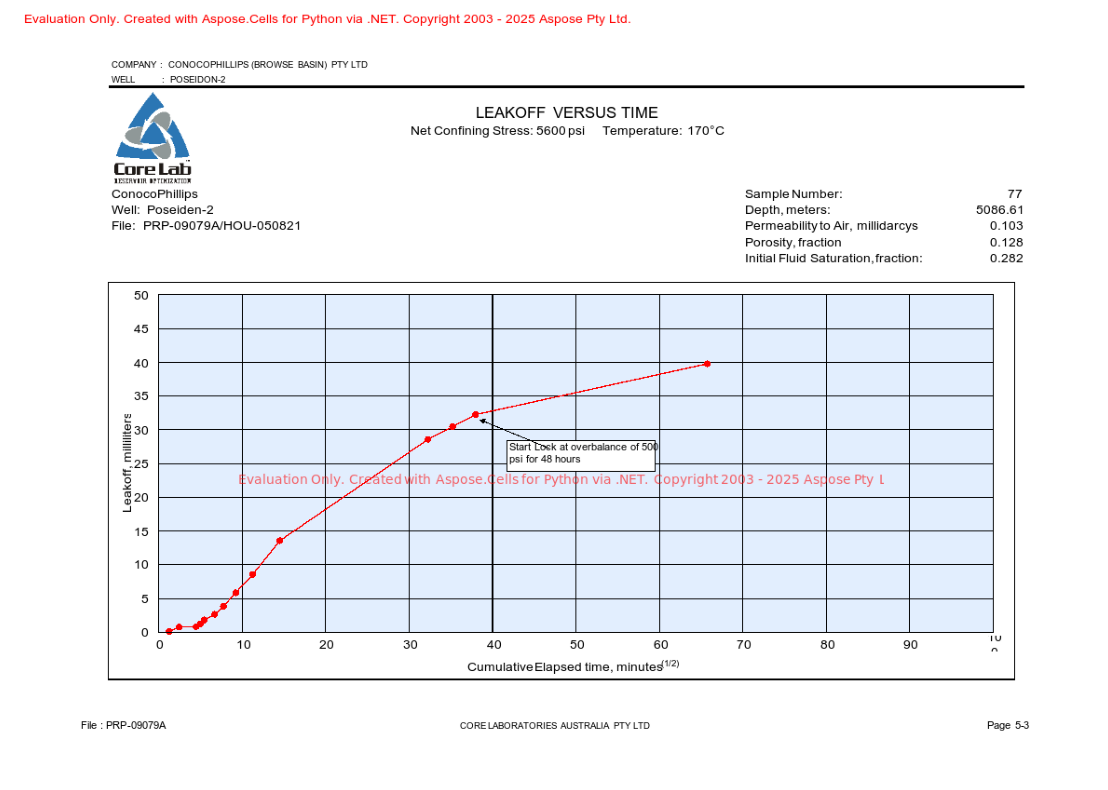



Report Name /content/pdf_copy/7-Poseidon 2 Regain Permeability to Gas.pdf, Page 3 with Relevancy score 18.75


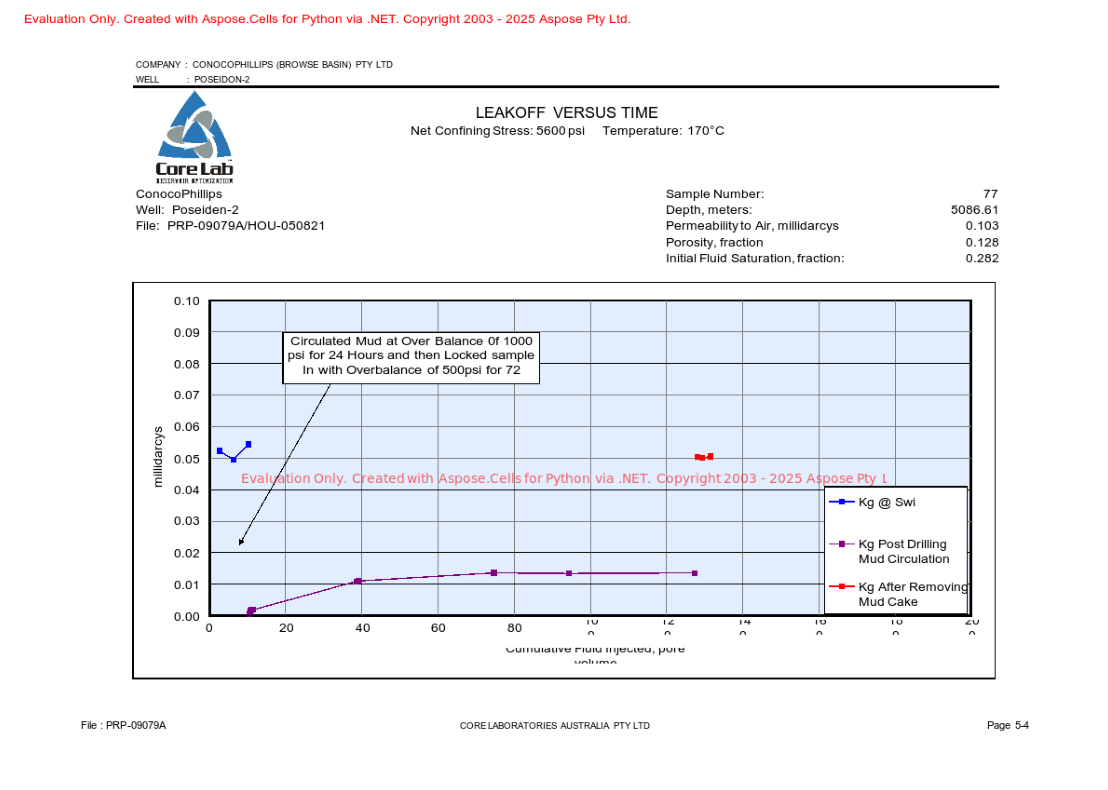



Report Name /content/pdf_copy/7-Poseidon 2 Regain Permeability to Gas.pdf, Page 4 with Relevancy score 18.625


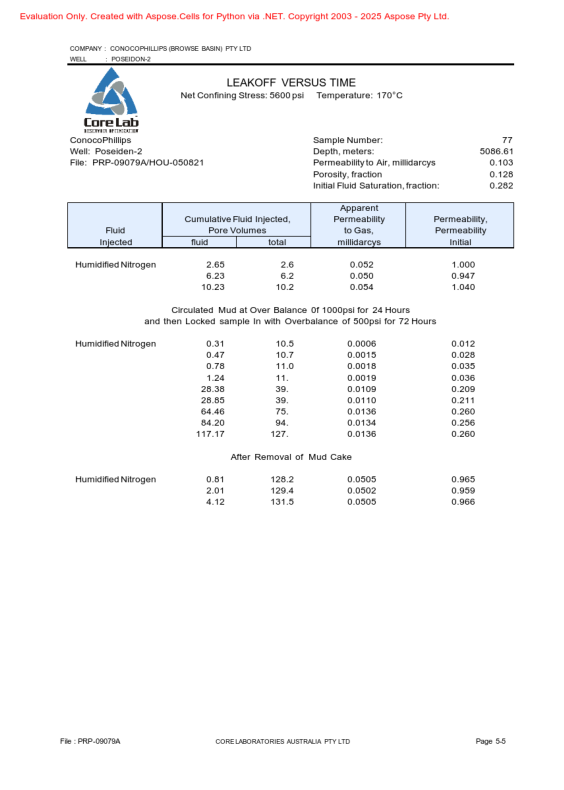

In [14]:
# # This query return spreadsheet file
rag_folder.RAG('what is the initial fluid saturation at leakoff vs time?', rag_models, k=3)

Report Name /content/pdf_copy/COP POSEIDON-2 PHOTOPLATE (N=6), 5-4-14.pdf, Page 4 with Relevancy score 16.25


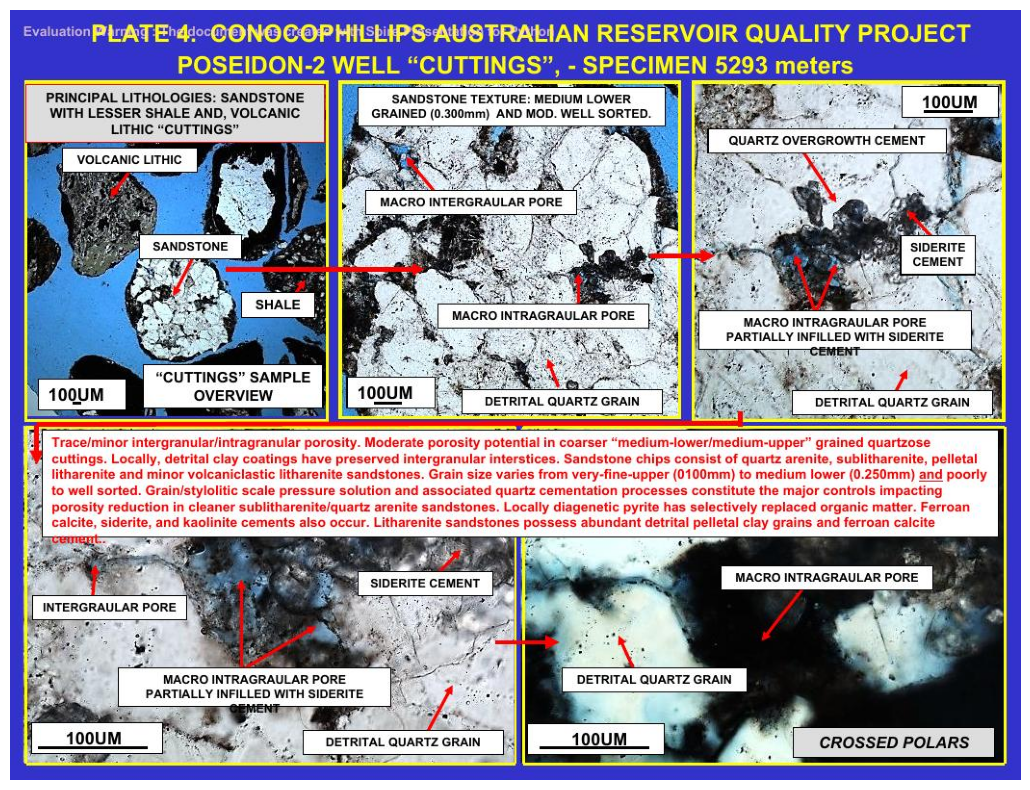



Report Name /content/pdf_copy/COP POSEIDON-2 PHOTOPLATE (N=6), 5-4-14.pdf, Page 2 with Relevancy score 15.6875


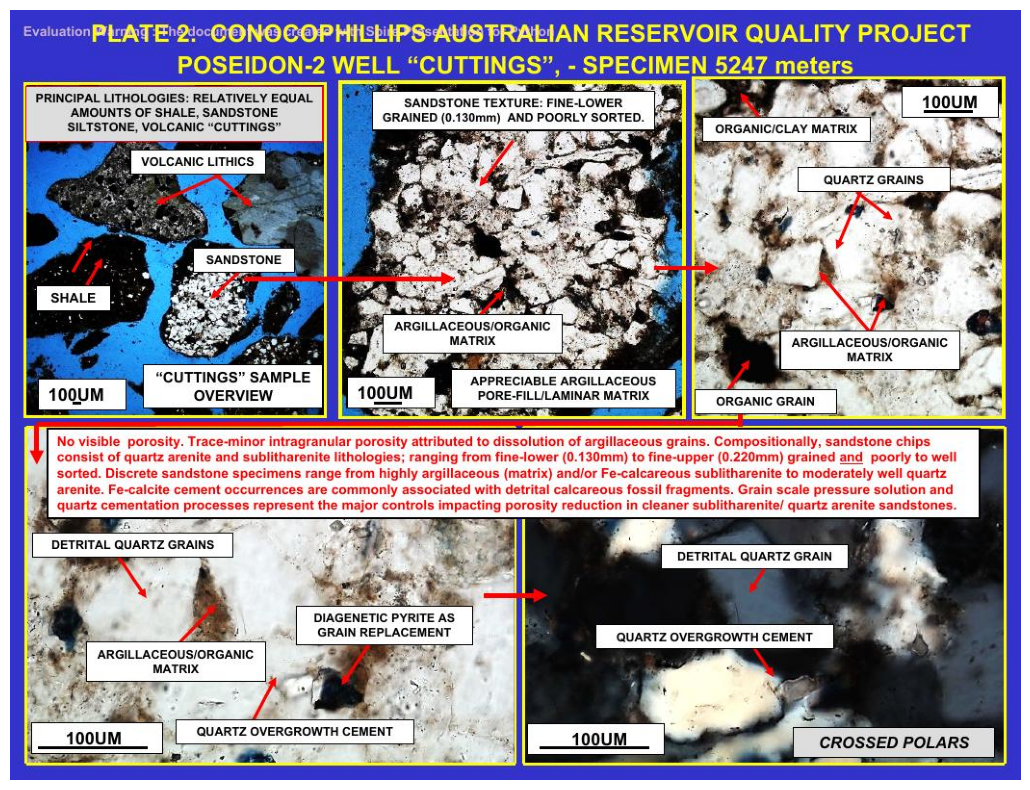



Report Name /content/pdf_copy/COP POSEIDON-2 PHOTOPLATE (N=6), 5-4-14.pdf, Page 5 with Relevancy score 15.0625


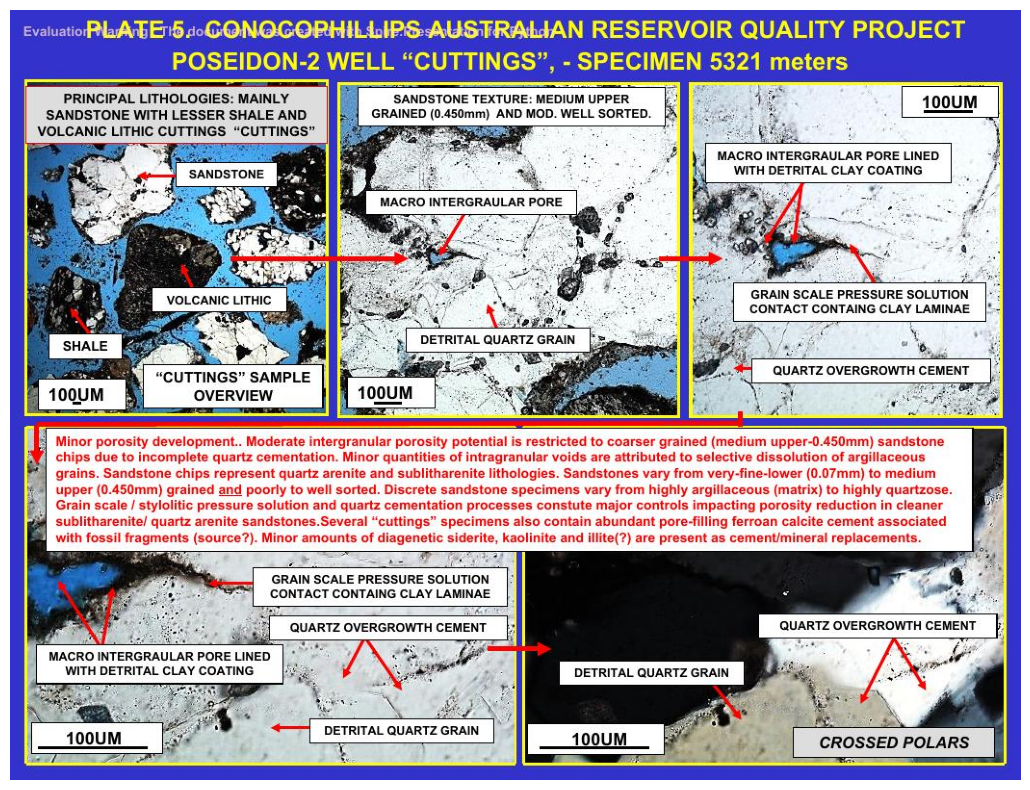

In [10]:
# This query return presentation file
rag_folder.RAG('describe about intragranular porosity seen in the sample.', rag_models, k=3)


And you can ask the documents directly using `Ask` function

Note it will return list of 3 elements

1st element is the answer

2nd element is another list consist of file path of the relevant report, the page of that report, and similarity score

3rd element is a PIL object. You can use Matplotlib to display the page.

In [11]:
rag_folder.Ask('what is the initial fluid saturation at leakoff vs time analysis?', rag_models)


(' The initial fluid saturation at leakoff vs time analysis is 0.282.',
 ['/content/pdf_copy/7-Poseidon 2 Regain Permeability to Gas.pdf', 2, 18.75],
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1169x827>)

In [12]:
rag_folder.Ask('describe about intragranular porosity seen in the sample.', rag_models)


(' The sample has moderate porosity potential in coarser “medium-lower/medium-upper” grained quartzose cuttings. Locally, detrital clay coatings have preserved intergranular interstratites.',
 ['/content/pdf_copy/COP POSEIDON-2 PHOTOPLATE (N=6), 5-4-14.pdf', 4, 16.25],
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1050x800>)